In [ ]:
!pip install numpy opencv-python matplotlib

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.measure import profile_line

In [ ]:
# Read the image file into a matrix with OpenCV
img_mat = cv.imread('wall_1.png', cv.IMREAD_GRAYSCALE)

# First row
print(img_mat[0])
plt.plot(img_mat[0])

In [ ]:
# Plot heatmap
plt.imshow(img_mat, cmap='hot', interpolation='nearest')

In [5]:
# Capture webcam feed and show the frames
cap = cv.VideoCapture(0)

while True:
    ret, frame = cap.read()

    # Convert to grayscale
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    cv.imshow('Webcam', frame_gray)

    if cv.waitKey(1) == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

Try the harder example...

In [ ]:
maze_img_mat = cv.imread("maze_test_1.png", cv.IMREAD_GRAYSCALE)
print(type(maze_img_mat))
print(maze_img_mat.shape)

plt.imshow(maze_img_mat, cmap='hot', interpolation='nearest')

In [ ]:
# Known issue: this function does not account for wall thickness
def compute_state_midpoints(img_mat, x_num_states, y_num_states):
    img_shape = img_mat.shape
    img_height = img_shape[0]
    img_width = img_shape[1]
    print("height = ", img_height, ", width = ", img_width)

    box_size = (img_width/x_num_states, img_height/y_num_states)
    print(box_size)

    state_mid_points = []
    for i in range(x_num_states):
        for j in range(y_num_states):
            print(i, ",", j)
            mid_point = (i*box_size[0] + box_size[0]/2.0, j*box_size[1] + box_size[1]/2.0)
            print("mid_point =", f'{mid_point[0]:.2f}', f'{mid_point[1]:.2f}')
            state_mid_points.append(mid_point)
    
    return(state_mid_points)


state_mid_points = compute_state_midpoints(maze_img_mat, 3, 3)
print(state_mid_points)

def compute_neighbouring_states(x_num_states, y_num_states):
    neighbouring_states = []
    total_num_states = x_num_states * y_num_states
    print(total_num_states)

    if x_num_states > 2 and y_num_states > 2:
        # top band states
        for i in range(0, x_num_states):
            print(i)
            # top left corner state (state 0)
            if i % x_num_states == 0:
                neighbouring_states.append([1, x_num_states])
            # top right corner state
            elif i % x_num_states == x_num_states-1:
                neighbouring_states.append([2*x_num_states-1, x_num_states-2])
            # top edge states
            else:
                neighbouring_states.append([i+1, i+x_num_states, i-1])

        # mid band states
        for i in range(x_num_states, total_num_states-x_num_states):
            #print(i)
            # left edge states
            if i % x_num_states == 0:
                neighbouring_states.append([i-x_num_states, i+1, i+x_num_states])
            # right edge states
            elif i % x_num_states == x_num_states-1:
                neighbouring_states.append([i-x_num_states, i+x_num_states, i-1])
            # middle states
            else:
                neighbouring_states.append([i-x_num_states, i+1, i+x_num_states, i-1])
        
        # bottom band states
        for i in range(total_num_states-x_num_states, total_num_states):
            print(i)
            # bottom left corner state
            if i % x_num_states == 0:
                neighbouring_states.append([i-x_num_states, i+1])
            # bottom right corner state
            elif i % x_num_states == x_num_states-1:
                neighbouring_states.append([i-x_num_states, i-1])
            # bottom edge states
            else:
                neighbouring_states.append([i-x_num_states, i+1, i-1])

    
    print(neighbouring_states)
    return neighbouring_states

neighbouring_states = compute_neighbouring_states(3, 3)





True


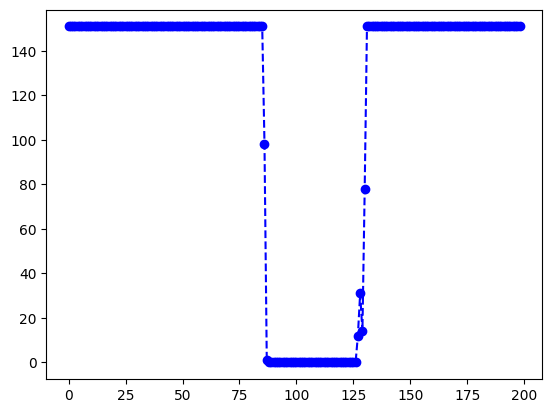

In [52]:
def check_wall_presence(state_a, state_b, state_mid_points, img_mat):
    profile = profile_line(img_mat, state_mid_points[state_a], state_mid_points[state_b], linewidth=1, mode='constant')
    plt.plot(profile, '--bo')

    # A wall is considered present if > x% of grayscale values are less than 10
    num_lt_10 = 0
    num_gt_10 = 0
    for i in range(0, len(profile)):
        # boom!
        if profile[i] < 10:
            num_lt_10 += 1
        else:
            num_gt_10 += 1
    #print("No. values less than 10 = ", num_lt_10)
    #print("No. values greater than 10 = ", num_gt_10)

    fraction_lt_10 = num_lt_10 / len(profile)
    #print(fraction_lt_10)

    if fraction_lt_10 > 0.025:
        return True
    else:
        return False
        

print(check_wall_presence(3, 6, state_mid_points, maze_img_mat))
#check_wall_presence(3, 4, state_mid_points, maze_img_mat)

In [54]:
def generate_maze_environment(img_mat, state_mid_points):
    for state_index, state_mid_point in enumerate(state_mid_points):
        print(state_index)


generate_maze_environment(maze_img_mat, state_mid_points)

(98.83333333333333, 99.33333333333333)
(98.83333333333333, 298.0)
(98.83333333333333, 496.66666666666663)
(296.5, 99.33333333333333)
(296.5, 298.0)
(296.5, 496.66666666666663)
(494.16666666666663, 99.33333333333333)
(494.16666666666663, 298.0)
(494.16666666666663, 496.66666666666663)
